In [58]:
import csv
import tweepy
import re
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import collections
import seaborn as sns
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

### Data Collection

In [59]:
consumer_key = "TQdFGlCeGV1KnhimdbNxetxQv"
consumer_secret = "uzcYHcRjmKapWtMokPAkMSAP9V5bJD2ETpufenQhWPMYLHB6mC"
access_token = "1323204428346855425-TnV70iRct91ZivQrqfobFCx6gcm5zB"
access_token_secret = "NEziLUEGDmzh14gq34aKxPDQiMjl8dtJsafVzxWqR8k5z"

In [60]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [61]:
# columns_name = ['timestamp', 'id', "user id", "tweet_content", "username", "followers", "all hashtags", "location"]
# wfh_data = pd.DataFrame(columns = columns_name)
# for tweet in tweepy.Cursor(api.search_full_archive, environment_name="WFH1", 
#                            query="(#workingfromhome OR #WFH OR #remotework OR #studyfromhome OR #zoomuniversity OR #remotework) -is:retweet lang:en place_country:us",        
#                            fromDate="202003020000", 
#                            toDate="202003140000",
#                            maxResults=500
#                            ).items():              
#                 wfh_data.loc[len(wfh_data.index)] = [
#                     tweet.created_at,
#                     tweet.id,
#                     tweet.user.id,
#                     tweet.text.replace('\n',' '), 
#                     tweet.user.screen_name, 
#                     tweet.user.followers_count, 
#                     [e['text'] for e in tweet._json['entities']['hashtags']],
#                     tweet.place]
# wfh_data.to_pickle("wfh_mar.pickle")
# wfh_data.to_csv("test.csv", index=False)

In [62]:
# file = open("wfh_mar.pickle", "rb")
# data = pickle.load(file)
# csv_file = open('test.csv', 'a')
# csv_writer = csv.writer(csv_file)
# for tweet in tweepy.Cursor(api.search_full_archive, environment_name="WFH1", 
#                            query="(#workingfromhome OR #WFH OR #remotework OR #studyfromhome OR #zoomuniversity OR #remotework) -is:retweet lang:en place_country:us",        
#                            fromDate="202004190000", 
#                            toDate="202004202359",
#                            maxResults=500
#                            ).items(500):
#     if tweet.id in data['id'].to_numpy():
#         continue
#     csv_writer.writerow([tweet.created_at, 
#                          tweet.id,
#                          tweet.user.id,
#                          tweet.text.replace('\n',' '),
#                          tweet.user.screen_name, 
#                          tweet.user.followers_count, 
#                          [e['text'] for e in tweet._json['entities']['hashtags']],
#                          tweet.place])
#     data.loc[len(data.index)] = [tweet.created_at, 
#                          tweet.id,
#                          tweet.user.id,
#                          tweet.text.replace('\n',' '), 
#                          tweet.user.screen_name, 
#                          tweet.user.followers_count, 
#                          [e['text'] for e in tweet._json['entities']['hashtags']],
#                          tweet.place]
# data.to_pickle("wfh_mar.pickle")
# data.to_csv("test.csv", index=False)

In [63]:
file = open("wfh_mar.pickle", "rb")
data = pickle.load(file)

### Data Preprocessing

In [64]:
sorted_data = data.sort_values(by='timestamp')
sorted_data["date"] = pd.to_datetime(sorted_data['timestamp']).dt.date

In [65]:
sorted_data.head()

,timestamp,id,user id,tweet_content,username,followers,all hashtags,location,date
538,2020-03-02 02:14:10,1234300936555827206,31557222,An incredible afternoon for a ski at Swedetown...,UPTreefarmer,1558,[],"Place(id='0188d8cc43ba6ac1', url='https://api....",2020-03-02
537,2020-03-02 15:47:31,1234505623741423617,296636356,This book was instrumental in establishing the...,PaulHill_io,1748,[],"Place(id='1879ace9e02ace61', url='https://api....",2020-03-02
536,2020-03-02 16:44:38,1234519999101984770,4305479414,Throwback to last year when we took some of th...,SymbolSyn,249,"[yyc, california]","Place(id='1cf657005480e70e', url='https://api....",2020-03-02
535,2020-03-02 17:02:03,1234524381071790080,12268532,Lots of talk about #collaboration and #remotew...,jwarnke,1350,"[collaboration, remotework]","Place(id='9807c5c5f7a2c6ce', url='https://api....",2020-03-02
534,2020-03-02 17:44:10,1234534979796783105,16280111,Remote workers are ideal now - if #employers h...,MeetDonnaW,1082,"[employers, remotework]","Place(id='4b58830723ec6371', url='https://api....",2020-03-02


In [66]:
def clean_text(text):
    text = text.apply(lambda x: re.sub(r"https\S+", "", str(x)))
#     text = text.apply(lambda x: x.lower())
    text = text.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
#     stop_words = set(stopwords.words('english'))
#     stop_words.update(["#workingfromhome", "#wfh"])
#     text = text.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    return text

In [67]:
tweets = clean_text(data["tweet_content"])

In [68]:
sid = SentimentIntensityAnalyzer()
sentiment_scores = tweets.apply(lambda x: sid.polarity_scores(x))
sent_scores_df = pd.DataFrame(list(sentiment_scores))

In [69]:
text_blob = tweets.apply(lambda tweet: TextBlob(tweet).sentiment)

In [70]:
nltk = sent_scores_df.to_numpy()
text_blob = text_blob.to_numpy()

In [71]:
# label = []
# for i in range(len(text_blob)):
#     if text_blob[i].polarity < 0 or nltk[i][3] < 0:
#         label.append("negative")
#         continue
#     if text_blob[i].polarity == 0 and nltk[i][3] > 0:
#         label.append("positive")
#         continue
#     if text_blob[i].polarity > 0 and nltk[i][3] == 0:
#         label.append("positive")
#         continue
#     if text_blob[i].polarity == 0 and nltk[i][3] < 0:
#         label.append("negative")
#         continue
#     if text_blob[i].polarity < 0 and nltk[i][3] == 0:
#         label.append("negative")
#         continue
#     if text_blob[i].polarity > 0 and nltk[i][3] > 0:
#         label.append("positive")
#         continue
#     if text_blob[i].polarity < 0 and nltk[i][3] < 0:
#         label.append("negative")
#         continue
#     if text_blob[i].polarity * nltk[i][3] < 0 or (text_blob[i].polarity == 0 and nltk[i][3] == 0):
#         if nltk[i][0] < nltk[i][2]:
#             label.append("positive")
#         elif nltk[i][0] > nltk[i][2]:
#             label.append("negative")
#         else:
#             label.append("neural")
#         continue

#     else:
# #         print(text_blob[i].polarity, nltk[i][3])
#         label.append("neural")
# sorted_data['labels'] = label
# sorted_data.to_pickle("sorted_wfh.pickle")

In [72]:
sorted_data.head()

,timestamp,id,user id,tweet_content,username,followers,all hashtags,location,date
538,2020-03-02 02:14:10,1234300936555827206,31557222,An incredible afternoon for a ski at Swedetown...,UPTreefarmer,1558,[],"Place(id='0188d8cc43ba6ac1', url='https://api....",2020-03-02
537,2020-03-02 15:47:31,1234505623741423617,296636356,This book was instrumental in establishing the...,PaulHill_io,1748,[],"Place(id='1879ace9e02ace61', url='https://api....",2020-03-02
536,2020-03-02 16:44:38,1234519999101984770,4305479414,Throwback to last year when we took some of th...,SymbolSyn,249,"[yyc, california]","Place(id='1cf657005480e70e', url='https://api....",2020-03-02
535,2020-03-02 17:02:03,1234524381071790080,12268532,Lots of talk about #collaboration and #remotew...,jwarnke,1350,"[collaboration, remotework]","Place(id='9807c5c5f7a2c6ce', url='https://api....",2020-03-02
534,2020-03-02 17:44:10,1234534979796783105,16280111,Remote workers are ideal now - if #employers h...,MeetDonnaW,1082,"[employers, remotework]","Place(id='4b58830723ec6371', url='https://api....",2020-03-02


In [73]:
file2 = open("bert_pred.pickle", "rb")
bert = pickle.load(file2)

In [74]:
len(bert), len(nltk), len(text_blob)

(14832, 14832, 14832)

#### set up rules to assign the sentiment (Positive, Negative, Netrual)

In [75]:
label = []
for i in range(len(bert)):
    if text_blob[i].polarity * nltk[i][3] > 0:
        if text_blob[i].polarity > 0:
            label.append("positive")
            continue
        else:
            label.append("negative")
            continue
            
            
    if text_blob[i].polarity * nltk[i][3] == 0:
        if bert[i] == 2:
            if max(text_blob[i].polarity, nltk[i][3]) > 0:
                label.append("positive")
                continue
            else:
                if text_blob[i].polarity == 0 and nltk[i][3] == 0:
                    label.append("positive")
                    continue
                else:
                    if text_blob[i].polarity < -0.3 or nltk[i][3] < -0.3:
                        label.append("negative")
                        continue
                    else:
                        label.append("neutral")
                        continue
        if bert[i] == 1:
            if max(text_blob[i].polarity, nltk[i][3]) > 0.3:
                label.append("positive")
                continue
            if 0 < max(text_blob[i].polarity, nltk[i][3]) < 0.3:
                label.append("neutral")
                continue
            if min(text_blob[i].polarity, nltk[i][3]) < 0:
                label.append("negative")
                continue
            if text_blob[i].polarity == 0 and nltk[i][3] == 0:
                label.append("neutral")
                continue
            else:
                label.append("neutral")
         
        if bert[i] == 0:
            if max(text_blob[i].polarity, nltk[i][3]) > 0.4:
                label.append("positive")
            else:
                label.append("negative")
            
            
    if text_blob[i].polarity * nltk[i][3] < 0:
        if bert[i] == 0:
            label.append("negative")
            continue
        elif bert[i] == 2:
            label.append("positive")
            continue
        else:
            if text_blob[i].polarity > 0 and abs(text_blob[i].polarity) > abs(nltk[i][3]):
                label.append("positive")
                continue
            elif text_blob[i].polarity < 0 and abs(text_blob[i].polarity) < abs(nltk[i][3]):
                label.append("positive")
                continue
            elif text_blob[i].polarity > 0 and abs(text_blob[i].polarity) < abs(nltk[i][3]):
                label.append("negative")
            elif text_blob[i].polarity < 0 and abs(text_blob[i].polarity) > abs(nltk[i][3]):
                label.append("negative")
            else:
                label.append("neutral")

In [76]:
count = collections.Counter(label)
count

Counter({'positive': 7484, 'negative': 3132, 'neutral': 4216})

In [77]:
sorted_data['labels'] = label

In [78]:
sorted_data.to_pickle("sorted_wfh_label_updated.pickle")

In [79]:
pos_dict = {}
neg_dict = {}
neu_dict = {}
for item in sorted_data.iterrows():
#     print(item[1].date)
    if item[1]["labels"] == "positive":
        pos_dict[item[1].date.strftime("%m-%d")] = pos_dict.get(item[1].date.strftime("%m-%d"), 0) + 1
    elif item[1]["labels"] == "negative":
        neg_dict[item[1].date.strftime("%m-%d")] = neg_dict.get(item[1].date.strftime("%m-%d"), 0) + 1
    elif item[1]["labels"] == "neutral":
        neu_dict[item[1].date.strftime("%m-%d")] = neu_dict.get(item[1].date.strftime("%m-%d"), 0) + 1

In [80]:
top_freq = {}
for item in sorted_data.iterrows():
    top_freq[item[1].date.strftime("%m-%d")] = top_freq.get(item[1].date.strftime("%m-%d"), 0) + 1

In [81]:
pos_df = pd.DataFrame.from_dict(pos_dict, orient="index", columns=["freq"])
pos_df = pos_df.reset_index()
neg_df = pd.DataFrame.from_dict(neg_dict, orient="index", columns=["freq"])
neg_df = neg_df.reset_index()
neu_df = pd.DataFrame.from_dict(neu_dict, orient="index", columns=["freq"])
neu_df = neu_df.reset_index()
daily_df = pd.DataFrame.from_dict(top_freq, orient="index", columns=["freq"])
daily_df = daily_df.reset_index()

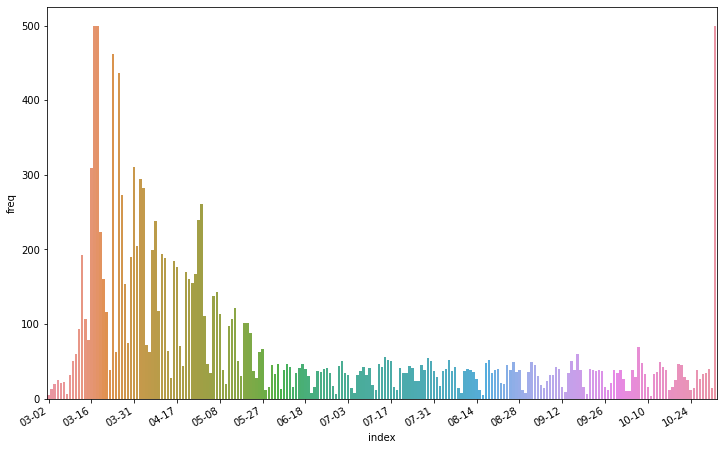

In [82]:
fig, ax = plt.subplots(figsize=(12,8))
daily_chart = sns.barplot(data=daily_df, x='index', y='freq', ax=ax)
freq = int(14)
ax.set_xticklabels(daily_df.iloc[::freq]['index'])
xtix = ax.get_xticks()
ax.set_xticks(xtix[::freq])
fig.autofmt_xdate()

In [83]:
pos_ratio = []
neg_ratio = []
neu_ratio = []
for date, freq in pos_dict.items():
    neg, neu = 0, 0
    if date in neg_dict:
        neg = neg_dict[date]
    if date in neu_dict:
        neu = neu_dict[date]
    ratio = freq / (freq + neg + neu)
    ratio1 = neg / (freq + neg + neu)
    ratio2 = neu / (freq + neg + neu)
    pos_ratio.append(ratio)
    neg_ratio.append(ratio1)
    neu_ratio.append(ratio2)

In [84]:
combine_df = pd.DataFrame()
combine_df['date'] = pos_dict.keys()
combine_df['postive'] = pos_ratio
combine_df['neutral'] = neu_ratio
combine_df['negative'] = neg_ratio
combine_df.set_index('date')

,postive,neutral,negative
date,,,
03-02,0.400000,0.000000,0.600000
03-03,0.307692,0.076923,0.615385
03-04,0.300000,0.500000,0.200000
03-05,0.400000,0.200000,0.400000
03-06,0.523810,0.238095,0.238095
...,...,...,...
10-28,0.333333,0.363636,0.303030
10-29,0.514286,0.285714,0.200000
10-30,0.525000,0.400000,0.075000


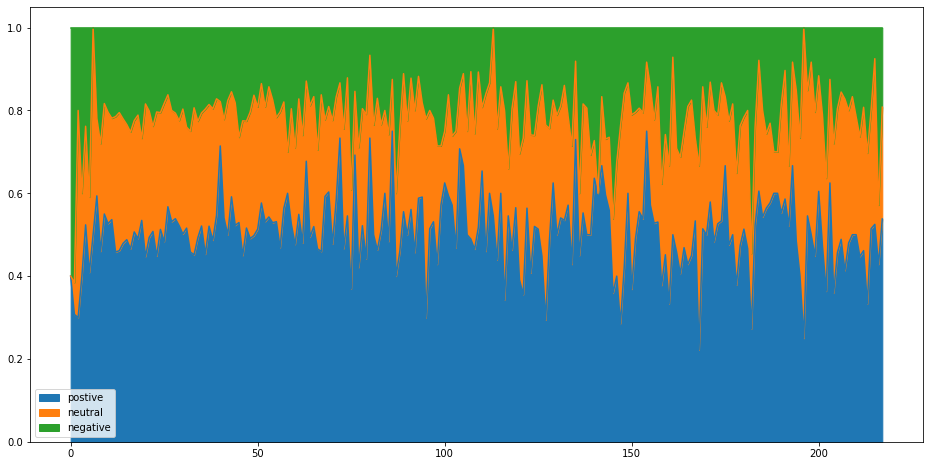

In [85]:
combine_df.plot.area(stacked=True,figsize=(16,8))